<h1><center>CSCI 4146/6409 - Process of Data Science (Summer 2023)</center></h1>
<h1><center>Assignment 1</center></h1>

<b>Tasneem Hoque</b>  
<b>B00841761</b> 

<b>Karan Aggarwal</b>  
<b>B00912580</b> 

### 1. [1.5] Business Understanding

#### a) Formulate a business problem that can be solved with the dataset. [0.25]

Airbnb hosts may struggle to determine the most appropriate nightly rates for their listings, especially if they are new to the platform or are unfamiliar with the local market. However, with the U.S. Airbnb Open Data, it is possible to analyze historical booking data and identify patterns and trends in pricing across different geographic locations.

By analyzing the data, businesses could determine the optimal pricing for their listings, taking into account factors such as location, property type, and minimum nights requirement. They could also identify high-demand periods and adjust their pricing strategy accordingly. This could lead to increased bookings and revenue for hosts, while also improving the overall guest experience by offering competitive rates.

#### b) For the business problem, propose 3 data science solutions and assess their feasibility. Select the final solution and explain your decision. [0.5]

**Solution 1: Availability prediction** 
* A model could be built to predict the availabilbility in the neighbourhood, and an appropriate pricing strategy could be used based on availability of other properties in the area.
* **Required data** - Historical claims of availability based on location.
* **Required business capacity** - Adujust some features of the Airbnb such as minimum nights requirement, or read reviews to understand customer requirements to increase airbnb bookings.

**Solution 2: Demand prediction**
* A model can be used to predict whether a given listing is likely to have a high or low demand based on a set of relevant features such as location and property type. Once the demand level has been predicted, hosts can adjust their pricing strategy accordingly.
* **Required data** - Data on all previous Airbnb listing with location, property type and their pricing
* **Required business capacity** - Changing the price of the listing based on demands.

**Solution 3: Review prediction**
* A model can be used to predict whether a given listing is likely to have a higher price point based on reviews.
* **Required data** - Data on all previous Airbnb listing with total reviews, monthly reviews and pricing.
* **Required business capacity** - Changing the price of the listing based on reviews.


The final solution for this business problem is demand prediction. The location is a major factor to pricing in conjuction to room type, neighbourhood, city and minimum nights. One additional factor that can be taken into account is availability of other properties in the same area. In general, the higher the demand, the more nightly rates the property will be able to collect.

#### c) For the final solution, identify the prediction subject, its domain concepts, and sub-concepts (if there are any). Draw a hierarchical graph of the concepts. [0.25]

For the final solution we are having the prediction subject as Price. 

It's domain concept could be Neighbouhood, Coordinates, Room Type, City, and Minimum Nights. 
Neighbourhood has sub domain as Neighbourhood Name and Neighbourhood Group.
Coordinates has sub domain as Longitude and Latitude. 

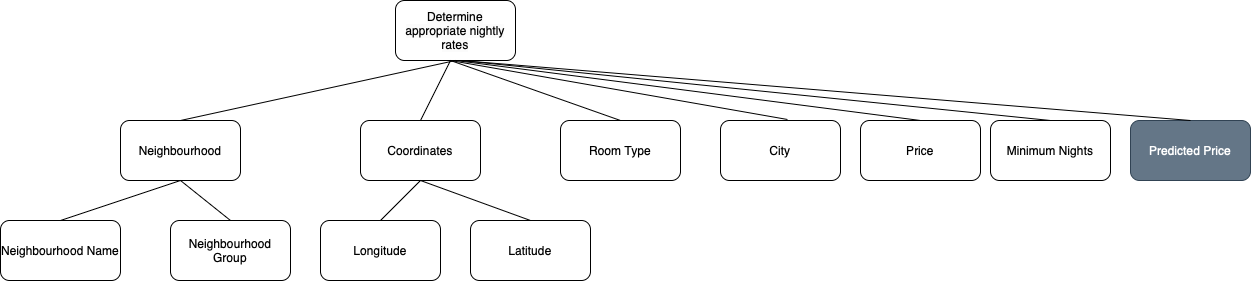

#### d) For each domain concept, design descriptive features that best describe a conceptusing data from the dataset. Summarize the resulting ABT in a table with the following columns [0.5]:
i. Feature Name
ii. Domain Concept
iii. Feature Description
iv. Feature Type
v. Data Type


1. Room type
    1. Type of room
2. Price
    1. Price equals 0 - Invalid data - Derived Flag
    2. Price > 0 and Price < 10000 - Raw
    3. Price < 100000 and price > 10000 - could be outliers - Derived Flag 
    4. Average Price for a room type - Derived Aggregate
    5. Average Price for a neighbourhood - Derived Aggregate
    6. Average Price City wise - Derived Aggregate
3. Neighbourhood Name
    1. Average Price for a neighbourhood - Derived Aggregate
4. Neighbourhood Group
    1. Diversity of Neighbourhood group - Derived Other
5. Coordinates
    1. Coordinates as per the Neighbourhood - Mapping
    2. Coordinates as per the Neighbourhood Group - Mapping
6. City
    1. Average Price City wise - Derived Aggregate
7. Minimum Nights
    1. Average Price to Minimum Nights and City - Derived Aggregate
8. Predicted Price

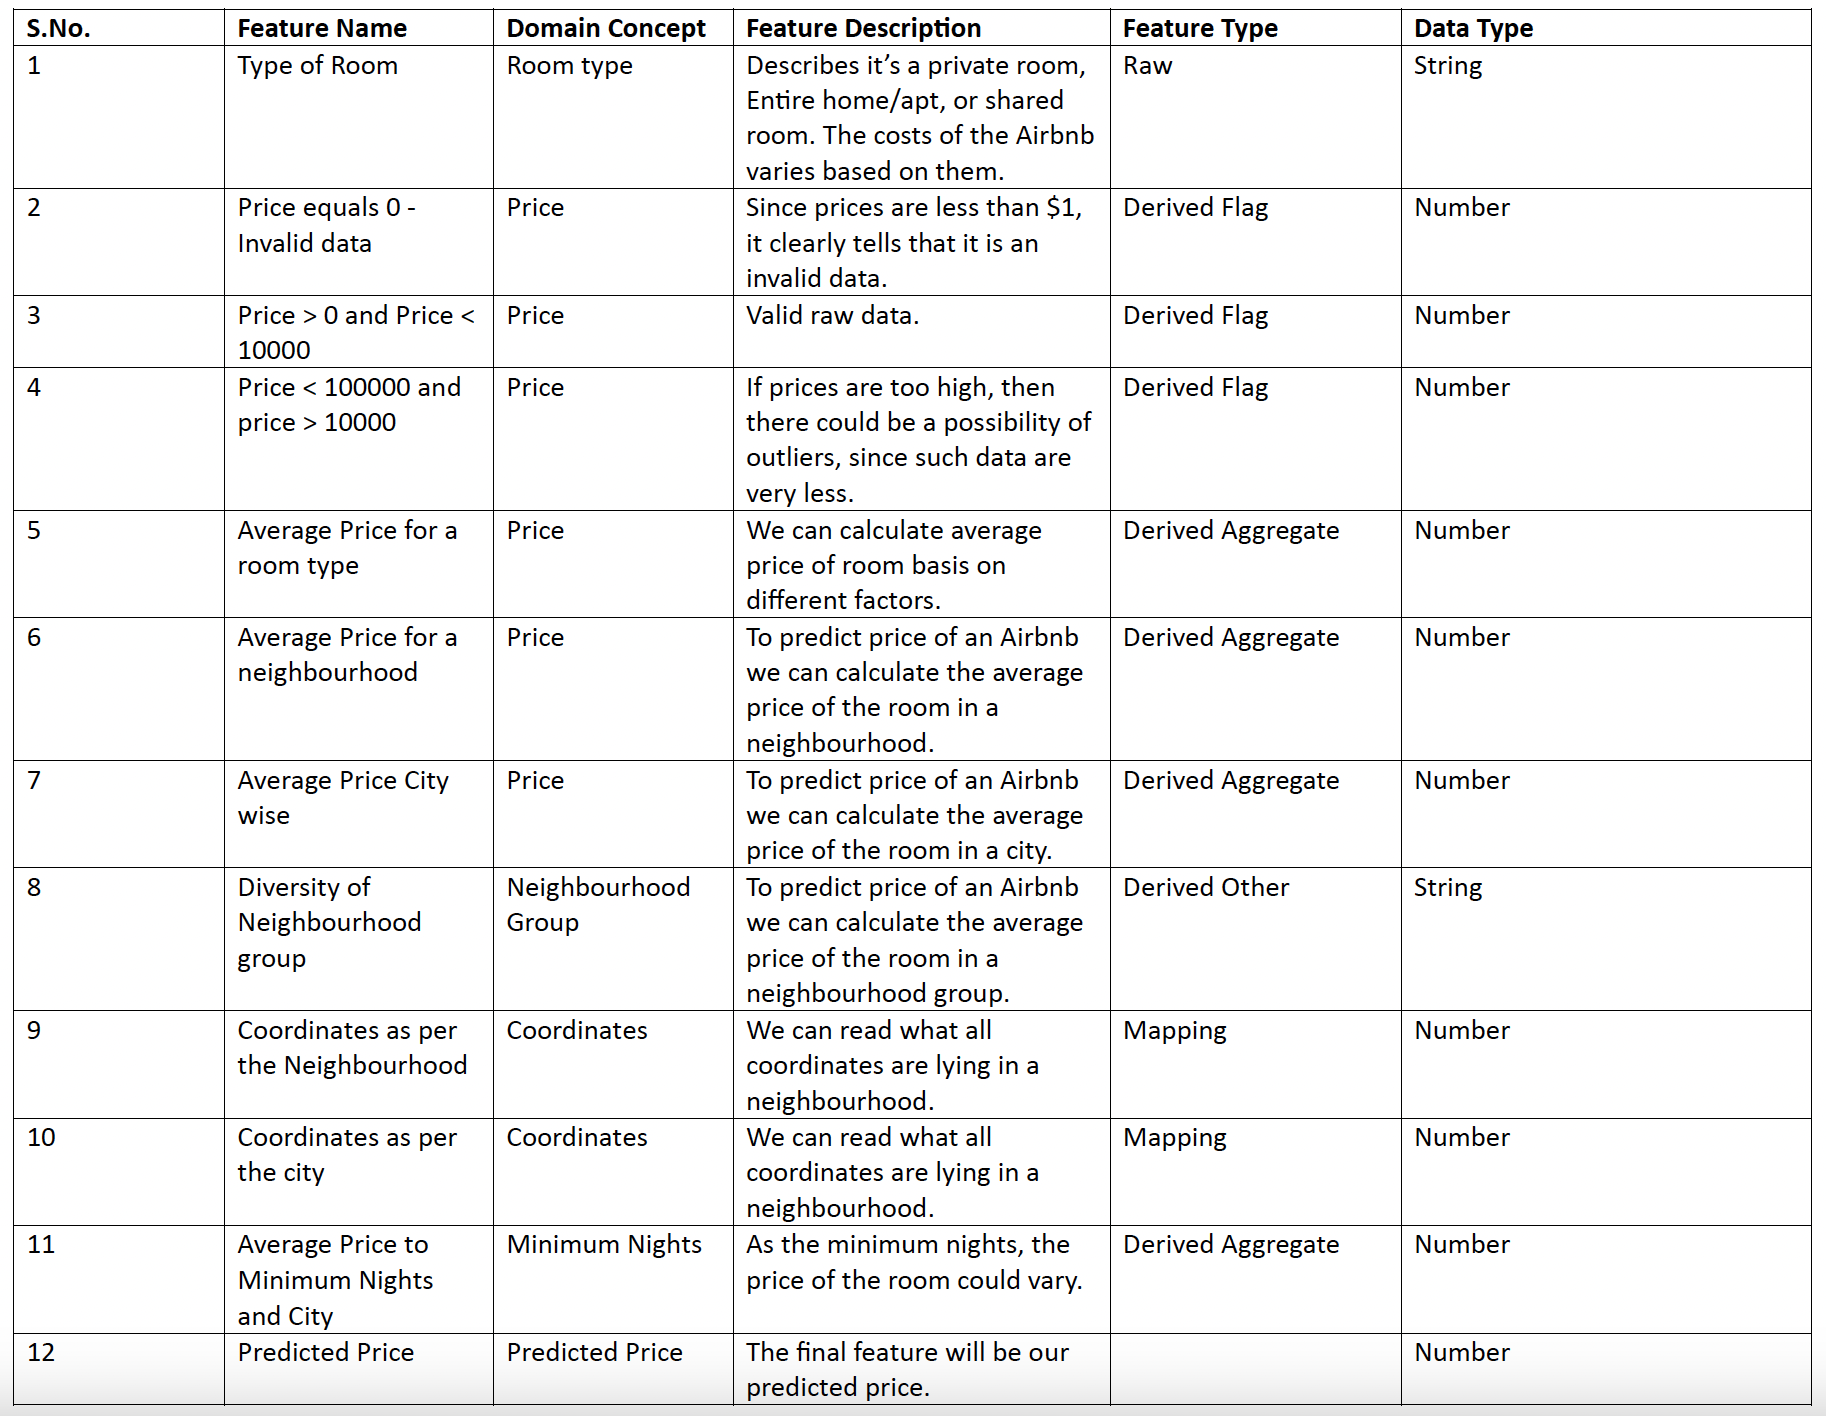

### 2. [1] Data Exploration

#### a) Build the data quality report of the resulting ABT. [0.5]

In [18]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

data = "AB_US_2023.csv"
details = pd.read_csv(data, low_memory=False)
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

As seen from the table above, we have a total of 232,147 records with 18 columns.<br>
Most of the data in the "neighbourhood group" column is NULL, with only 96,500 non-null values out of the 232,147 records.<br>
The "name" and "host name" columns have a few missing rows. <br>
Additionally, some of the Airbnb listings do not have any reviews provided. <br>

Now, let's have a look on few of the rows to better understand the data. 

In [2]:
details.loc[0:3]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco


Based on the data presented above, it can be inferred that the "name" column contains more information than just the name of the Airbnb listing. It appears to provide additional details such as the type of accommodation (e.g. 1BR or sanctuary) and location details. <br>

The remaining columns provide IDs, host names, group and neighborhood information, longitude and latitude coordinates, and other details to help identify and locate each listing. Additionally, the "room type" column should be treated as categorical data and can be split into two categories - "entire home" or "private room", for example. 

Next, we will examine the statistics of the data.

In [3]:
details_without_id = details.drop('id', axis=1)
details_without_id.describe(include = 'all')

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
count,232131,2.321470e+05,232134,96500,232147,232147.000000,232147.000000,232147,232147.000000,232147.000000,232147.000000,183062,183062.000000,232147.000000,232147.000000,232147.000000,232147
unique,220164,NaN,29368,30,1412,NaN,NaN,4,NaN,NaN,NaN,3147,NaN,NaN,NaN,NaN,27
top,Presidential Suite In A Mansion,NaN,Blueground,City of Los Angeles,Unincorporated Areas,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2023-03-05,NaN,NaN,NaN,NaN,New York City
freq,150,NaN,4305,22204,11882,NaN,NaN,169142,NaN,NaN,NaN,5008,NaN,NaN,NaN,NaN,42931
mean,NaN,1.582248e+08,NaN,NaN,NaN,36.610585,-98.301436,NaN,259.468001,13.495867,40.915230,NaN,1.638348,29.879055,180.985686,11.689701,NaN
std,NaN,1.587164e+08,NaN,NaN,NaN,5.126523,19.706929,NaN,1024.645918,27.920631,80.649152,NaN,1.910812,106.013665,134.715299,20.599954,NaN
min,NaN,2.300000e+01,NaN,NaN,NaN,25.957323,-123.089130,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,NaN,2.299242e+07,NaN,NaN,NaN,33.976225,-118.315111,NaN,91.000000,2.000000,1.000000,NaN,0.310000,1.000000,52.000000,0.000000,NaN
50%,NaN,1.005783e+08,NaN,NaN,NaN,36.190556,-97.727670,NaN,149.000000,3.000000,9.000000,NaN,1.000000,2.000000,175.000000,3.000000,NaN
75%,NaN,2.686930e+08,NaN,NaN,NaN,40.717440,-77.026222,NaN,250.000000,30.000000,43.000000,NaN,2.420000,10.000000,321.000000,16.000000,NaN


Since a lot other stats are missing, we will be manually checking median, mode, variance, range, kurtosis, skew, covariance and correlation. 

In [4]:
    stats = {
        "Median": lambda details: details.median(),
        "Mode": lambda details: details.mode().iloc[0],
        "Variance": lambda details: details.var(),
        "Range": lambda details: details.max() - details.min(),
        "Kurtosis": lambda details: details.kurtosis(),
        "Skew": lambda details: details.skew(),
        "Covariance": lambda details: details.iloc[:,0].cov(details.iloc[:,1]),
        "Correlation": lambda details: details.iloc[:,0].corr(details.iloc[:,1])
    }
    
    number_details = details.select_dtypes("number").columns
    data = details[number_details]
    
    report = pd.DataFrame(index=number_details, columns=stats.keys())
    
    for stat_name, fn in stats.items():
        report[stat_name] = fn(data)
        
    report


,Median,Mode,Variance,Range,Kurtosis,Skew,Covariance,Correlation
id,4.896307e+07,1.398981e+06,1.201305e+35,8.581014e+17,-1.504092,0.639792,2.164280e+25,0.393428
host_id,1.005783e+08,1.074344e+08,2.519089e+16,5.069383e+08,-0.723879,0.824883,2.164280e+25,0.393428
latitude,3.619056e+01,3.610761e+01,2.628124e+01,2.177669e+01,-0.358114,-0.189426,2.164280e+25,0.393428
longitude,-9.772767e+01,-1.151616e+02,3.883631e+02,5.209313e+01,-1.719888,0.055468,2.164280e+25,0.393428
price,1.490000e+02,1.500000e+02,1.049899e+06,1.000000e+05,4717.267259,57.065465,2.164280e+25,0.393428
minimum_nights,3.000000e+00,1.000000e+00,7.795616e+02,1.249000e+03,417.859111,14.770285,2.164280e+25,0.393428
number_of_reviews,9.000000e+00,0.000000e+00,6.504286e+03,3.091000e+03,36.575840,4.350472,2.164280e+25,0.393428
reviews_per_month,1.000000e+00,1.000000e+00,3.651202e+00,1.014100e+02,182.251882,6.419711,2.164280e+25,0.393428
calculated_host_listings_count,2.000000e+00,1.000000e+00,1.123890e+04,1.002000e+03,43.238413,6.172384,2.164280e+25,0.393428
availability_365,1.750000e+02,0.000000e+00,1.814821e+04,3.650000e+02,-1.529300,-0.003551,2.164280e+25,0.393428


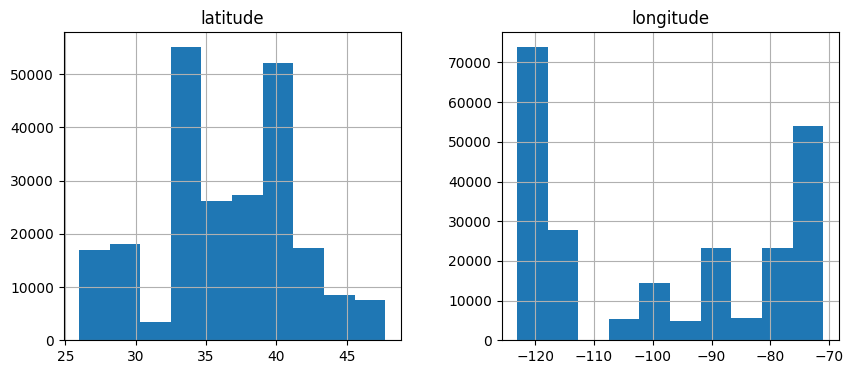

In [5]:
from matplotlib import pyplot
fig, axs = pyplot.subplots(1, 2, figsize=(10, 4)) 
details.hist(column='latitude', ax=axs[0])
details.hist(column='longitude', ax=axs[1])  
pyplot.show()  # show the figure

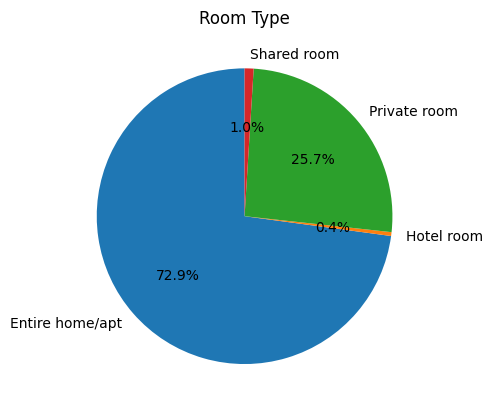

In [6]:
room_type_counts = details.groupby('room_type').size()
pyplot.pie(room_type_counts, labels = room_type_counts.index, autopct='%.1f%%', startangle = 90)
pyplot.title('Room Type')
pyplot.show()

The majority of the listings on Airbnb are for entire homes/apartments, while private rooms account for only 25% of the listings. Shared rooms and hotel rooms are relatively infrequently listed on Airbnb.

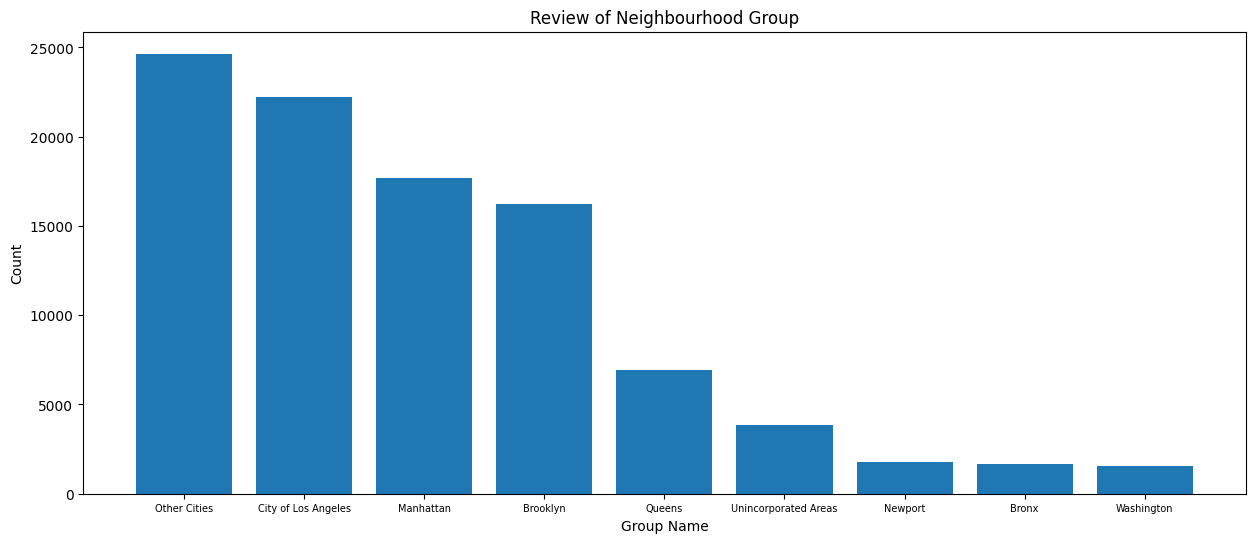

In [42]:
fig, ax = pyplot.subplots(figsize=(15, 6))
neighbourhood_group = details['neighbourhood_group'].value_counts()
newgroup = neighbourhood_group[neighbourhood_group <= 1500]
neighbourhood_group = neighbourhood_group[neighbourhood_group >= 1500]
neighbourhood_group['Other Cities'] = newgroup.sum() + neighbourhood_group['Other Cities']
neighbourhood_group = neighbourhood_group.sort_values(ascending=False)
pyplot.bar(neighbourhood_group.index, neighbourhood_group.values)

pyplot.title('Review of Neighbourhood Group')
pyplot.xlabel('Group Name')
pyplot.ylabel('Count')
pyplot.xticks(fontsize=7)
pyplot.show()

Upon comparing the number of listings for a particular neighborhood group, it has been observed that the City of Los Angeles has the highest number of listings, with more than 20,000 listings. This suggests that it may be the most popular city among Airbnb owners.

Text(0, 0.5, 'City')

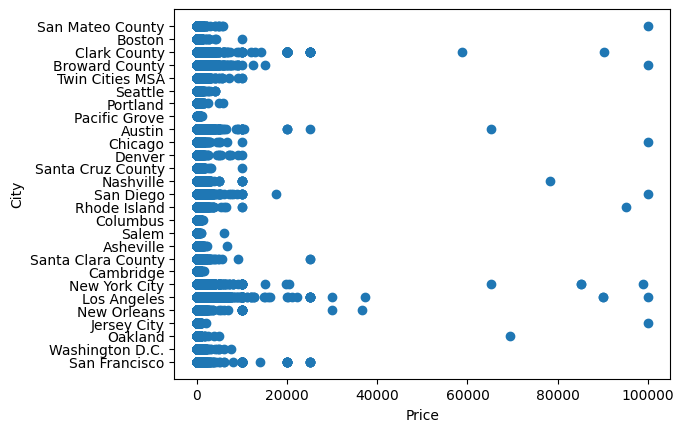

In [8]:
pyplot.scatter(details['price'], details['city'])
pyplot.xlabel('Price')
pyplot.ylabel('City')

During the comparison of price differences among different cities, it was discovered that Los Angeles is the most expensive city, while Salem is the cheapest. This finding highlights a strong correlation between price and city.

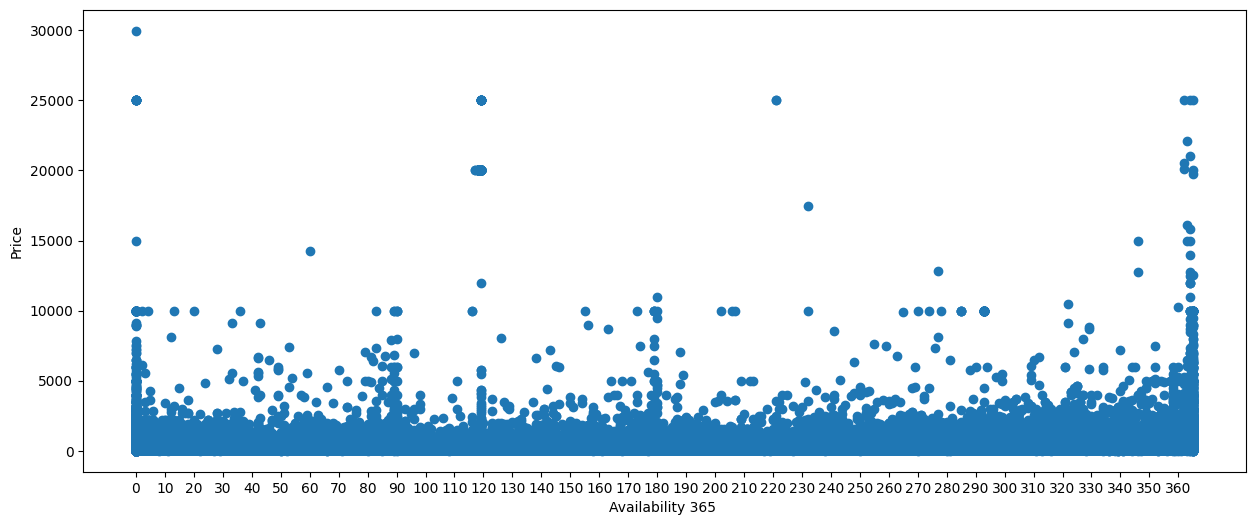

In [9]:
fig, ax = pyplot.subplots(figsize=(15, 6))
pyplot.scatter(details['availability_365'][details['price'] < 30000], details['price'][details['price'] < 30000])
pyplot.xlabel('Availability 365 ')
plt.xticks(range(0, 366, 10))
pyplot.ylabel('Price')
pyplot.show()

Since there is no direct relation between the availability of the airbnb and the price, the availability column can be dropped.

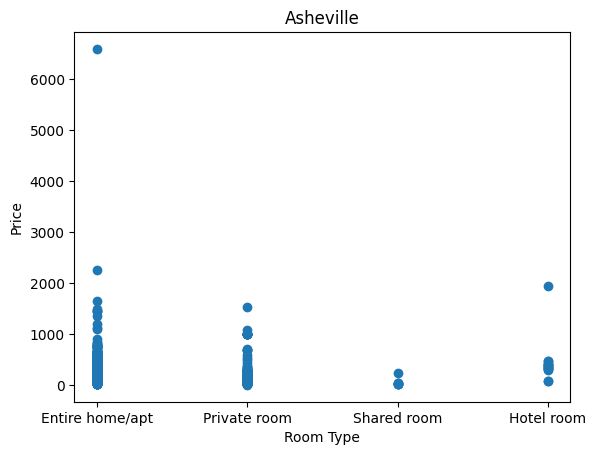

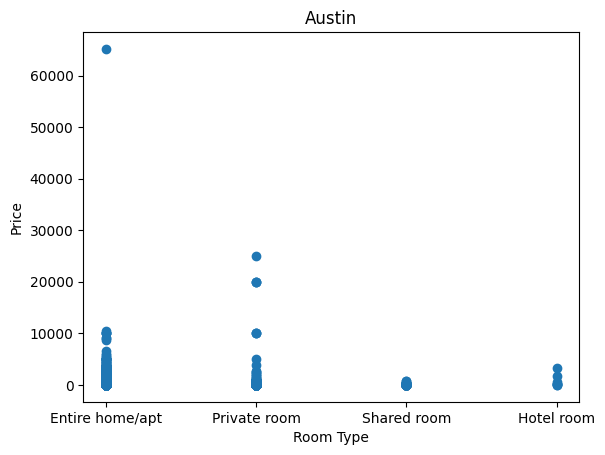

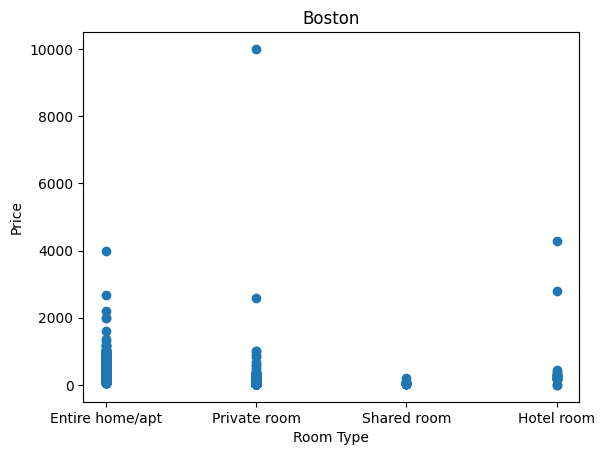

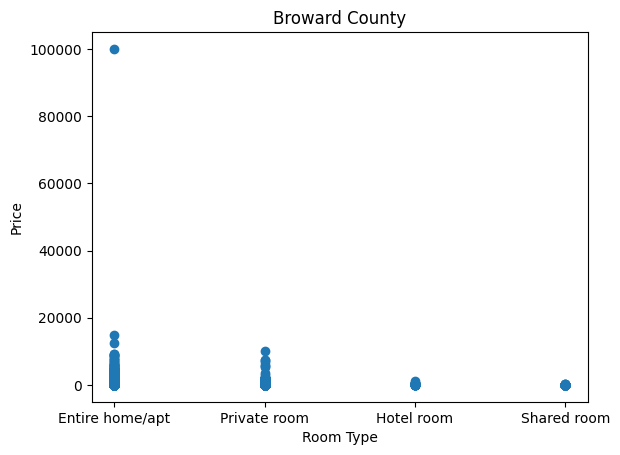

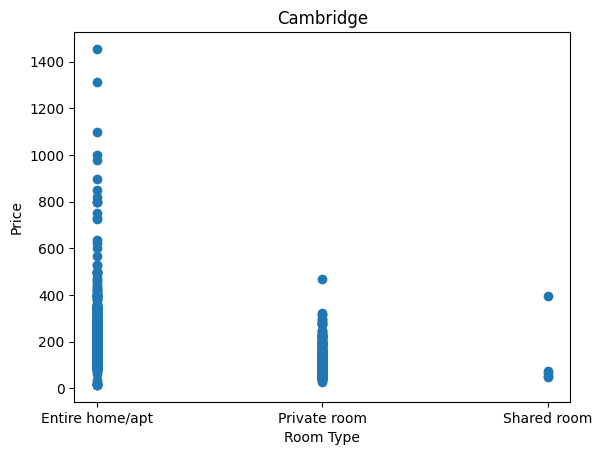

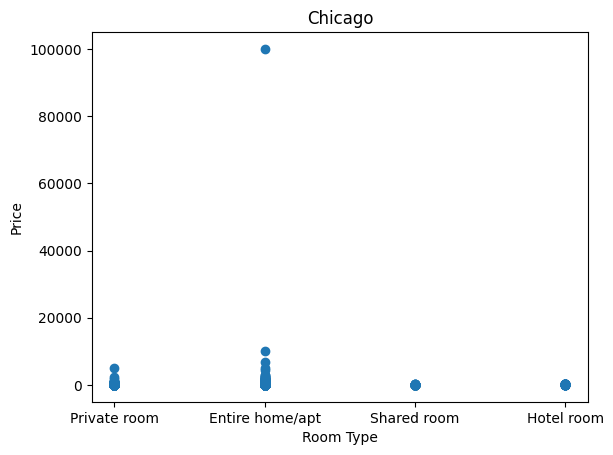

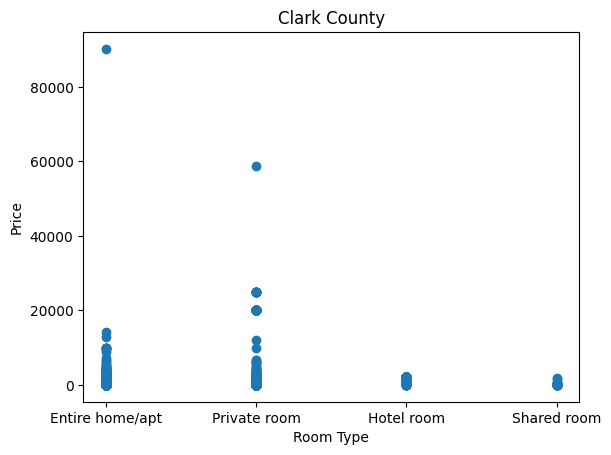

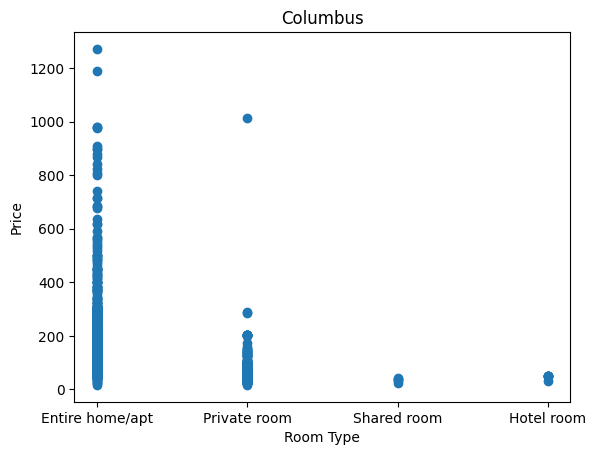

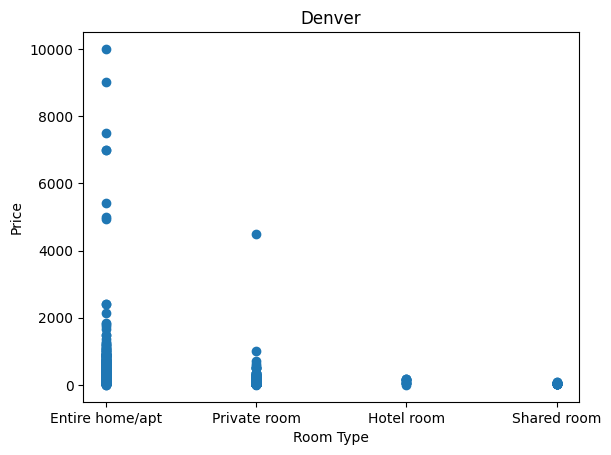

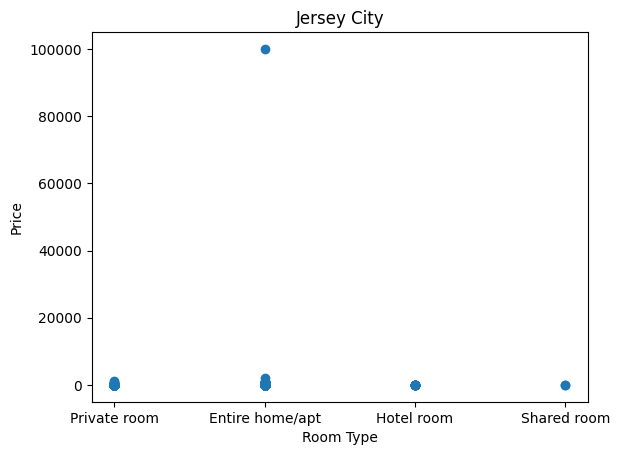

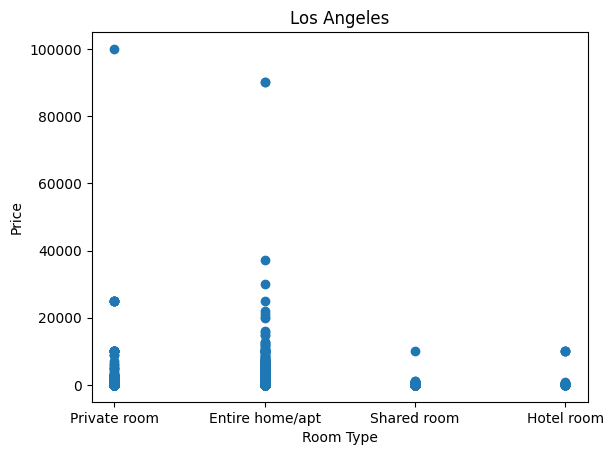

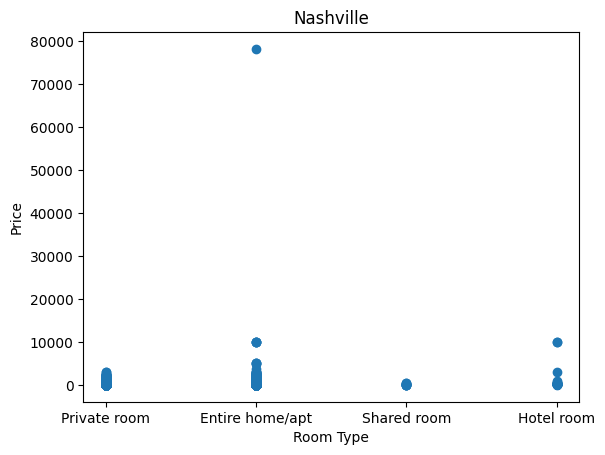

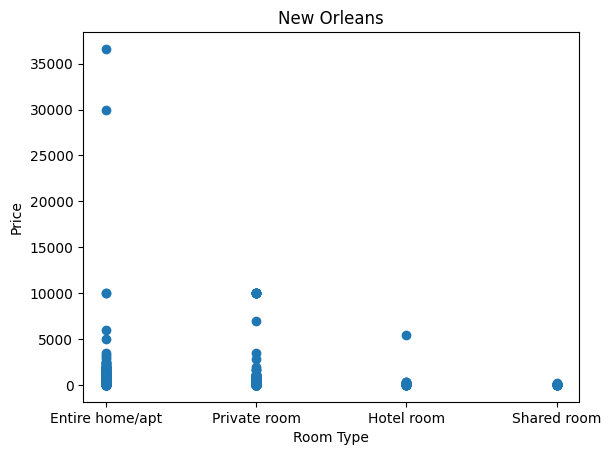

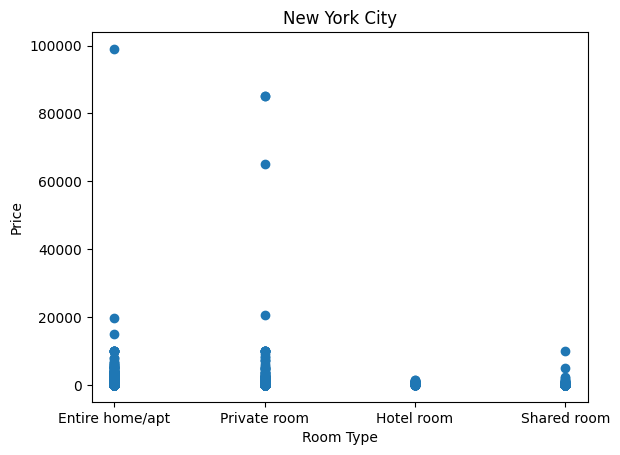

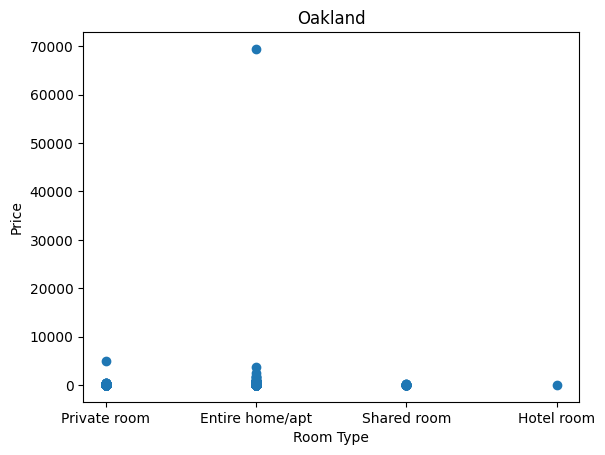

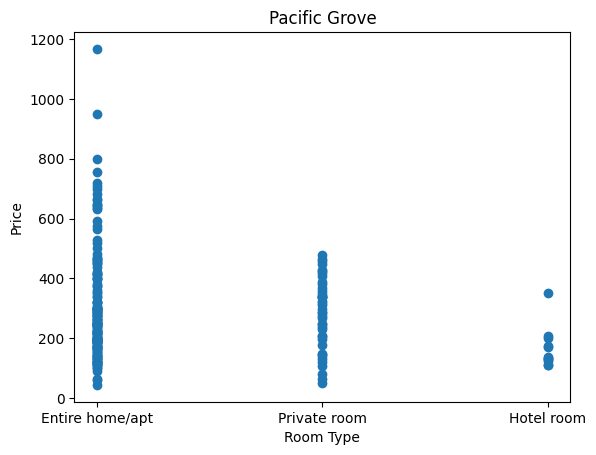

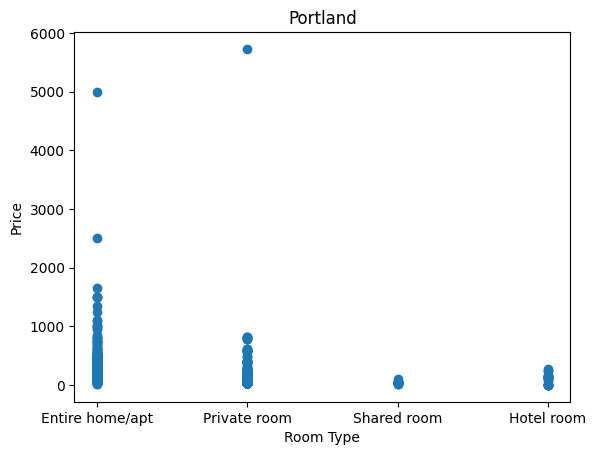

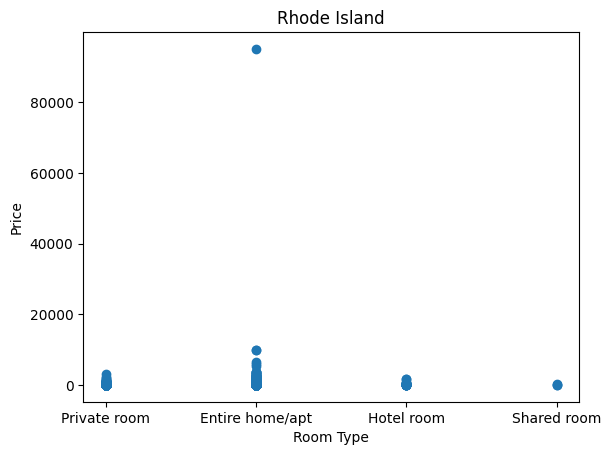

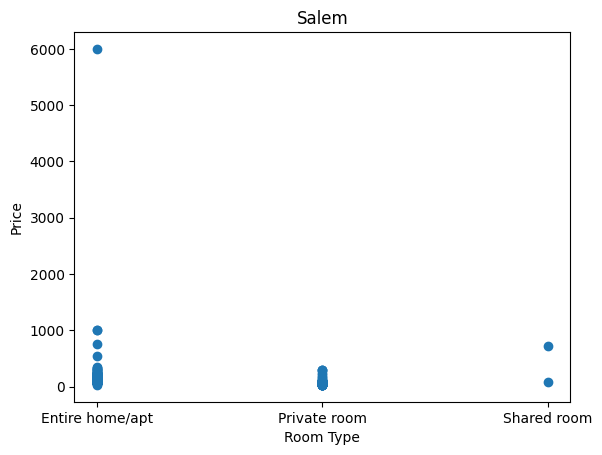

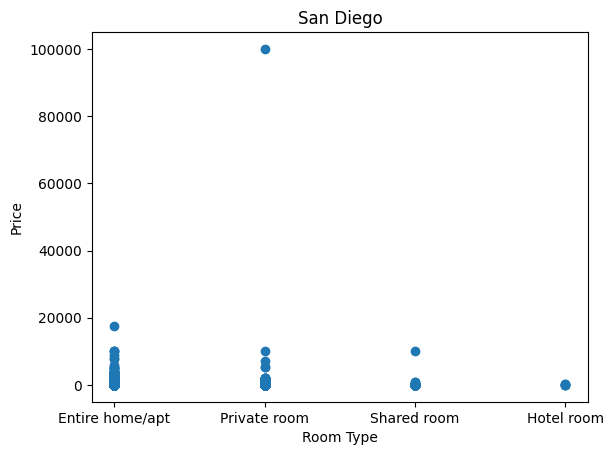

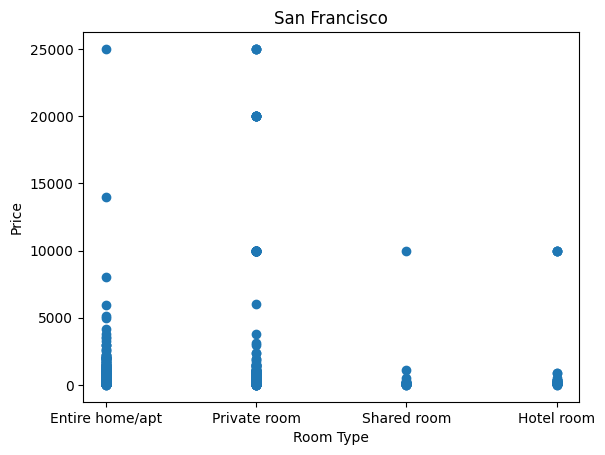

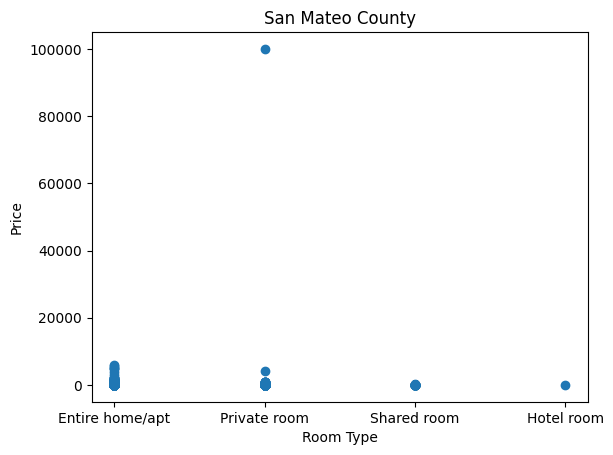

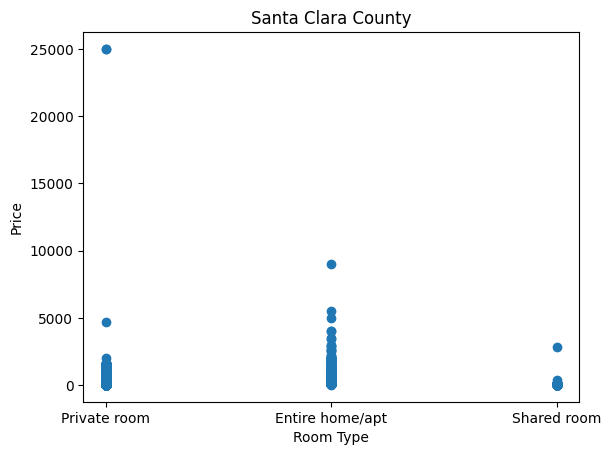

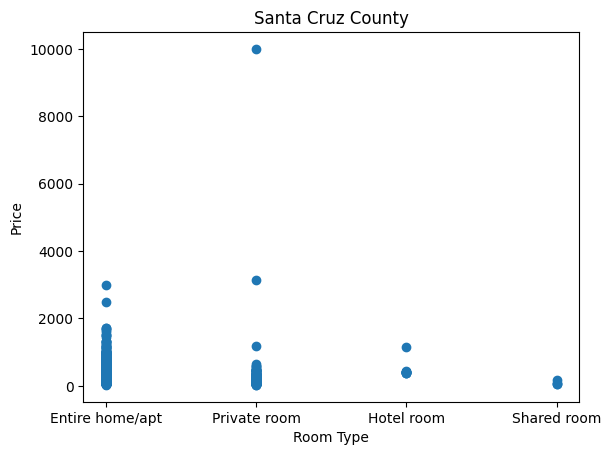

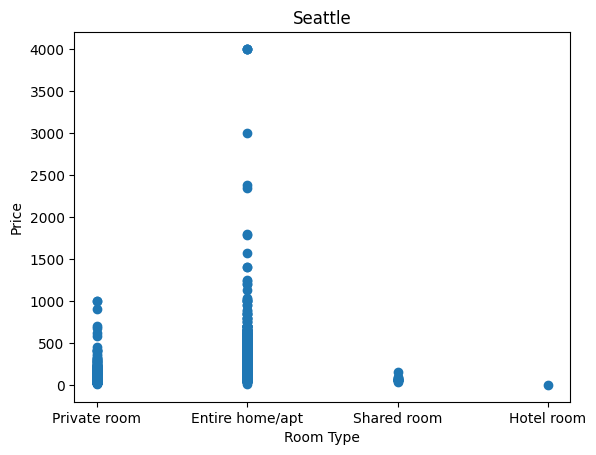

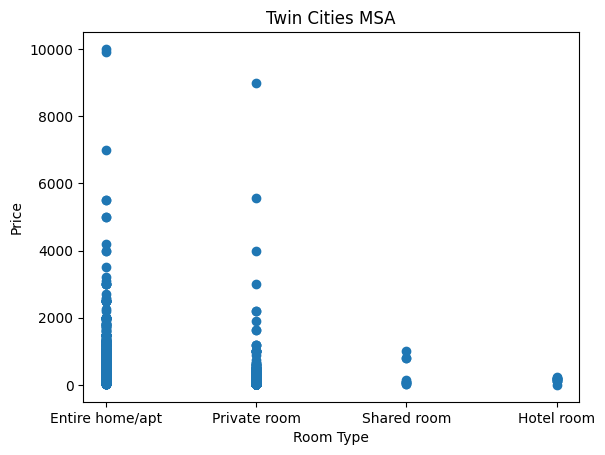

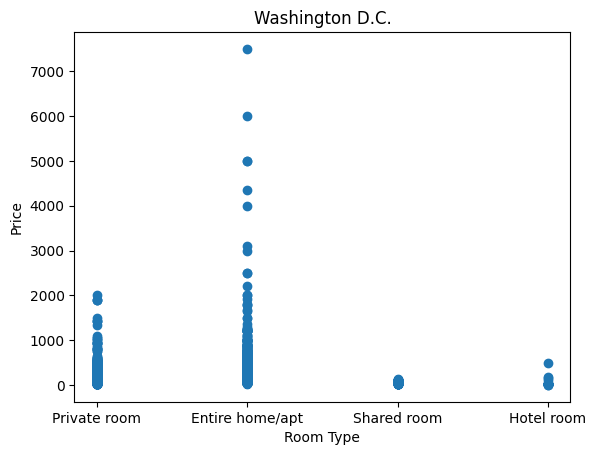

In [10]:
city = details.groupby('city')

for city, data in city:
    plt.figure()
    plt.scatter(data['room_type'], data['price'])
    plt.title(city)
    plt.xlabel('Room Type')
    plt.ylabel('Price')
    plt.show()

When comparing the prices of different room types across various cities, it was observed that for most cities, entire homes/apartments are the most expensive, followed by private rooms, hotels, and shared rooms, in descending order of price.

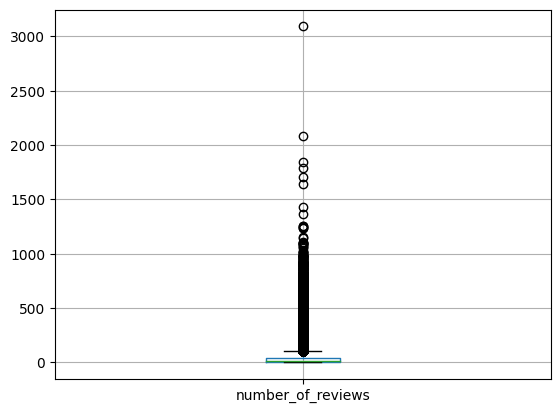

In [11]:
details.boxplot(column=['number_of_reviews']);

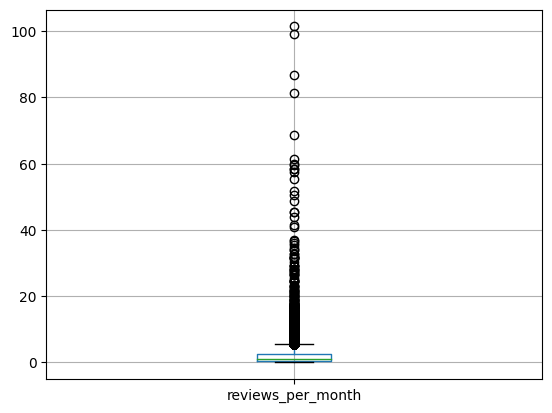

In [12]:
details.boxplot(column=['reviews_per_month']);

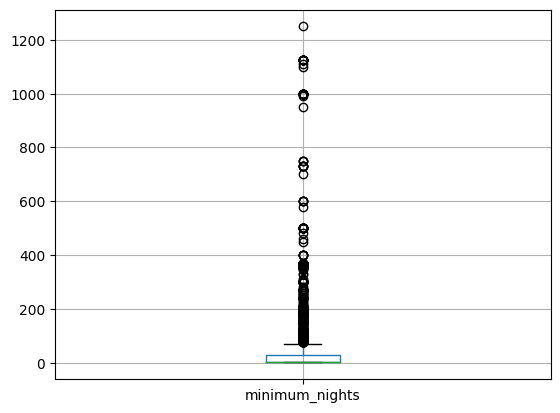

In [13]:
details.boxplot(column=['minimum_nights']);

We have generated distinct boxplots for minimum nights, reviews per month, and total reviews to compare and test the presence of outliers in our dataset.

#### b) Identify data quality issues and build the data quality plan. [0.5]

​
To identify issues with data quality, visualizations can be utilized to detect various anomalies, such as missing values, outliers, and cardinality issues.<br>
​
The first issue is missing values, which occurs when a considerable amount of data is absent or unknown from a particular column. By visualizing these values, we can detect their quality and identify potential gaps in the data.<br>
​
The second issue is outliers, which refers to data that has values that are outside the expected range. These anomalies could be caused by junk or irregular data, or by a specific value that is different from the range of values in the data. It is essential to detect and address such anomalies, as they can significantly degrade the overall quality of the data.<br>
​
The third issue is cardinality, which refers to the diversity of values in a particular dataset. Data with just one specific value may not be useful, while data with an excessive amount of diverse values may make it difficult to predict values accurately. Identifying such irregular data is crucial, as it can degrade the quality of the data and render it less useful for analysis.<br>

In [14]:
details.isnull().sum()

id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64


Of all the columns required for our price prediction, most of the data does not contain any null values, with the exception of the neighborhood group column. <br>
Moving forward, we will examine the data for outliers in the room_type, minimum_nights, and price columns.

In [15]:
room_type_counts = details.groupby('room_type').size()
print(room_type_counts)

room_type
Entire home/apt    169142
Hotel room            970
Private room        59759
Shared room          2276
dtype: int64


The room_type column does not exhibit any outliers in particular. It Simply contains four distinct types of data: Entire home/apt, Hotel room, Private room, and Shared room.

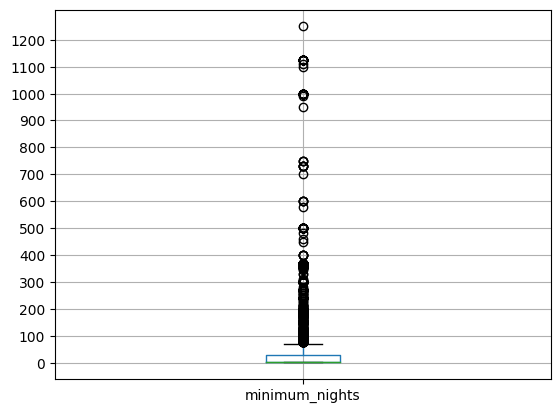

In [16]:
import numpy as np
details.boxplot(column=['minimum_nights']);
pyplot.yticks(np.arange(0, 1300, 100));

the Minimum Nights column contains a large number of outlier values.

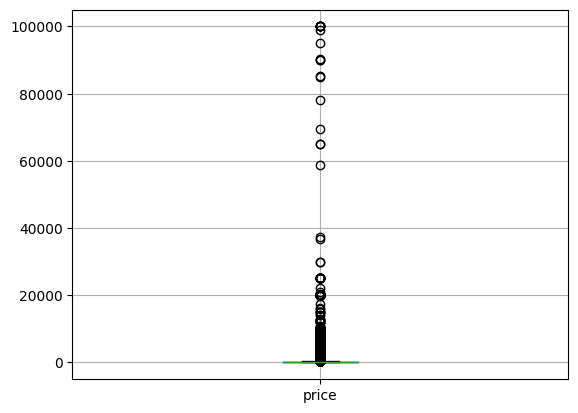

In [17]:
details.boxplot(column=['price']);

As can be seen, the price column contains a large number of outlier values. Let us further examine this issue.

(0.0, 1000.0)

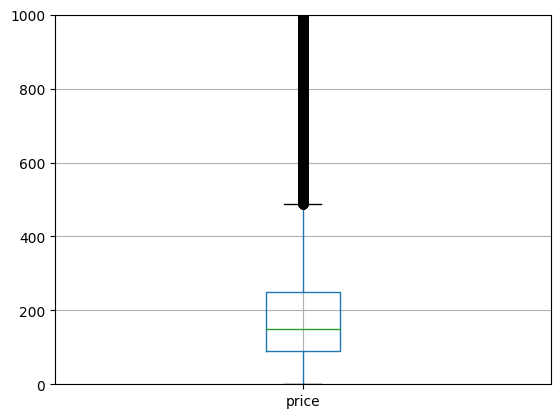

In [18]:
details.boxplot(column=['price']);
pyplot.ylim(0, 1000)

Text(0, 0.5, 'neighbourhood')

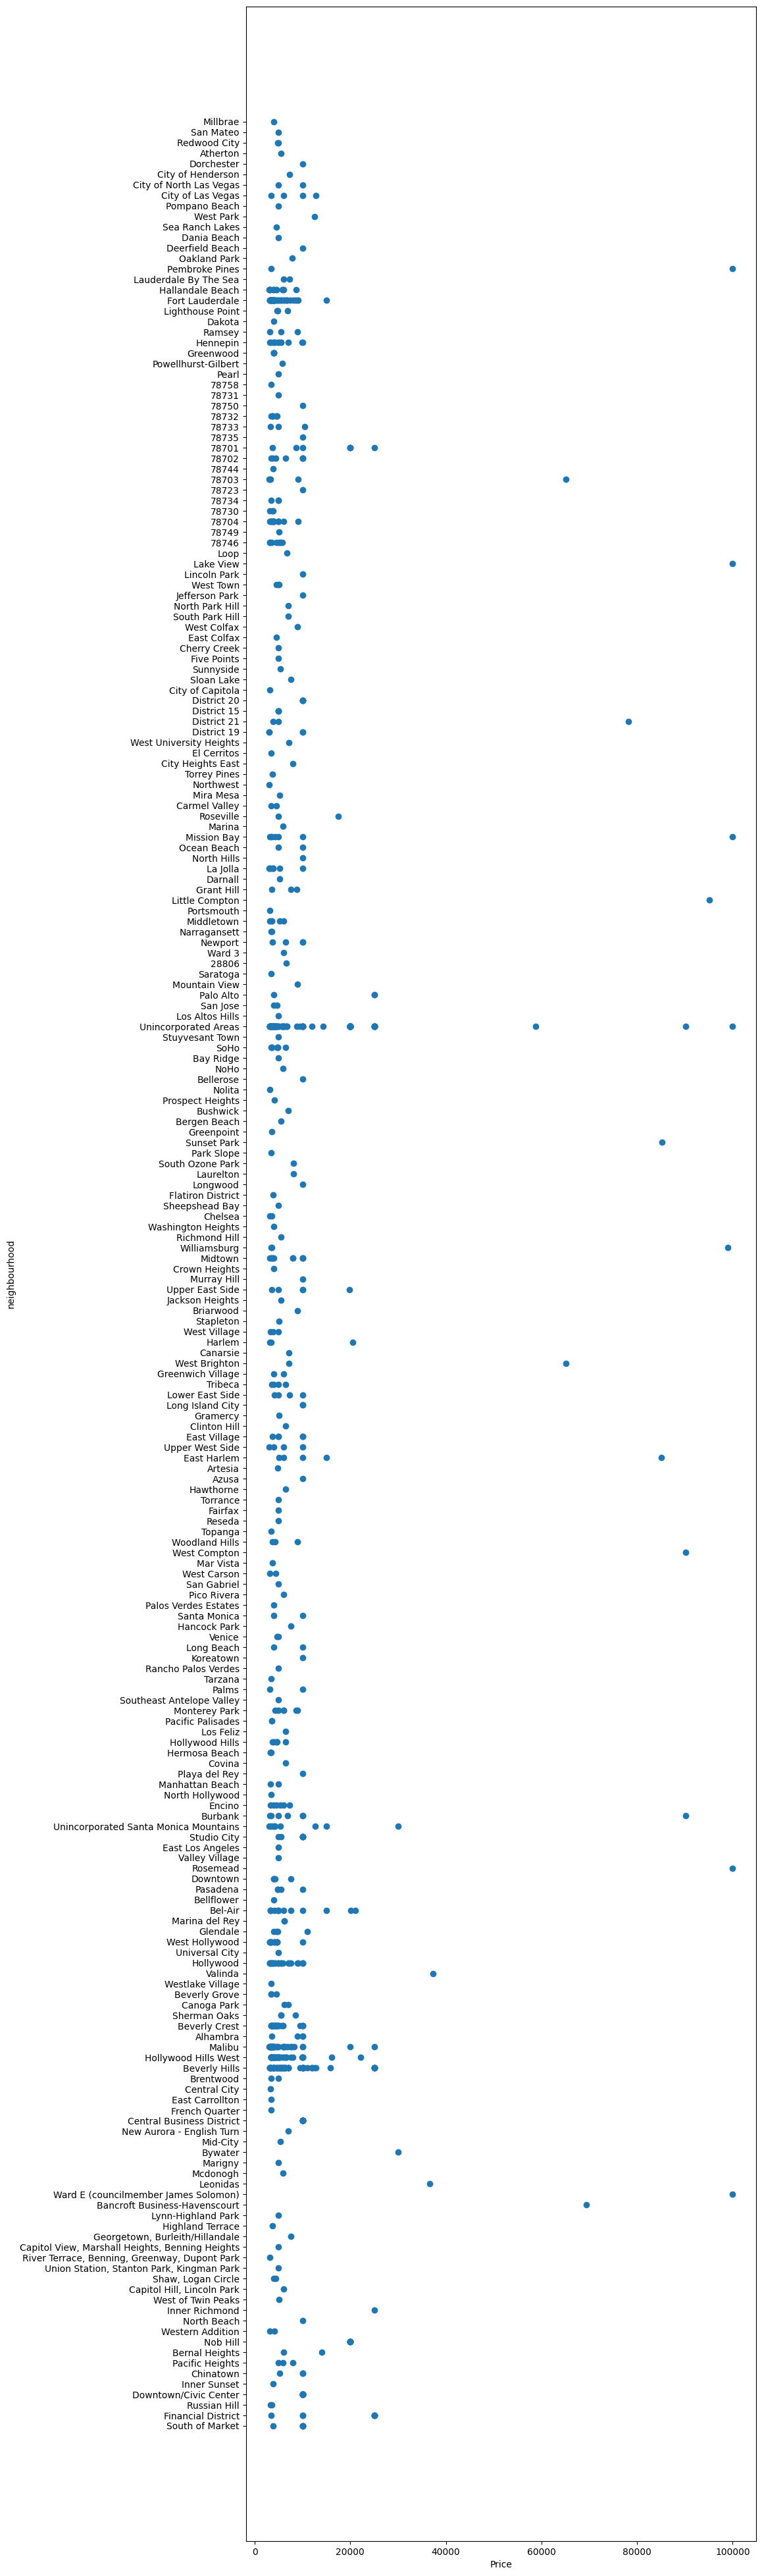

In [19]:
fig, ax = pyplot.subplots(figsize=(10, 50))
outliers = details[details['price'] > 3000]
pyplot.scatter(outliers['price'], outliers['neighbourhood'])
pyplot.xlabel('Price')
pyplot.ylabel('neighbourhood')

We visualized the neighbourhood groups with outliers

In [20]:
outliers[['price', 'neighbourhood']].sort_values('price')

,price,neighbourhood
109487,3006,Upper West Side
148038,3012,District 19
137989,3018,Northwest
172783,3036,78703
54534,3036,Unincorporated Santa Monica Mountains
201784,3045,Hallandale Beach
24954,3049,Malibu
129266,3049,La Jolla
141506,3057,District 19
6565,3093,Western Addition


From the graph above we should be good to remove outliers from price with values greater than 3000.  

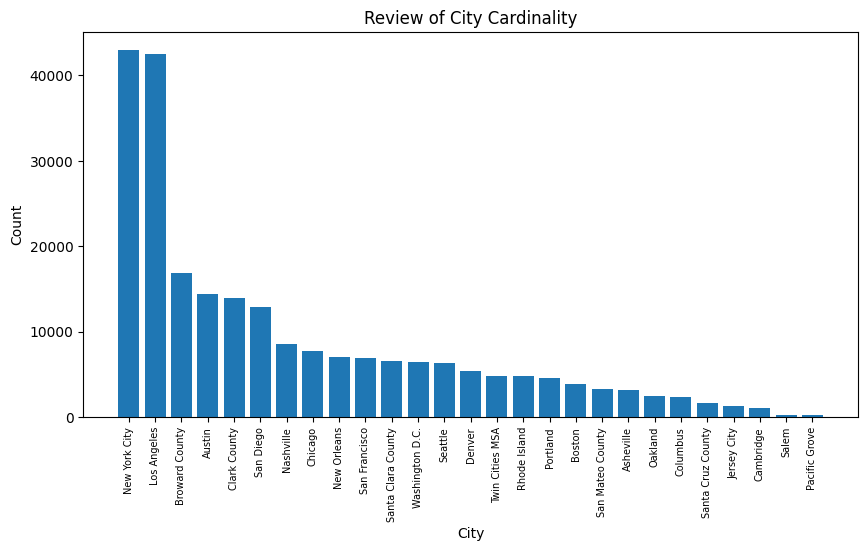

Unique values to check cardinality are


27

In [21]:
city = details['city'].value_counts()
pyplot.figure(figsize=(10,5))

pyplot.bar(city.index, city.values)

pyplot.title('Review of City Cardinality')
pyplot.xlabel('City')
pyplot.ylabel('Count')
pyplot.xticks(fontsize=7, rotation=90)
pyplot.show()

print('Unique values to check cardinality are')
details['city'].nunique()

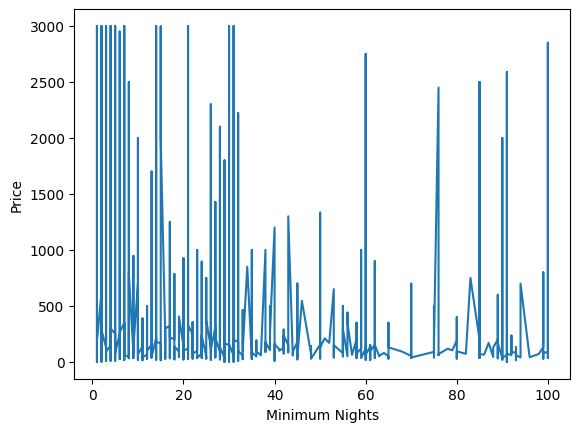

In [22]:
# Taking minimum nights <100 and price < 3000 due to cardinality issues inferred from above.  
sorted_details = details[(details['minimum_nights'] <= 100) & (details['price'] <= 3000)].sort_values('minimum_nights', ascending=True)
pyplot.plot(sorted_details['minimum_nights'], sorted_details['price'])
pyplot.xlabel('Minimum Nights')
pyplot.ylabel('Price')
pyplot.show()

Based on the graph, it can be inferred that there is no significant correlation between minimum nights and price. The rate of price fluctuation does not seem to be affected by changes in minimum nights. Moreover, the cardinality of minimum nights is too high, which results in irregular patterns and makes it difficult to analyze the relationship between these variables.

The trend suggests that the price is decreasing as the number of minimum nights increases, except for a few scenarios. This pattern may indicate the presence of outliers. Let us investigate this further.

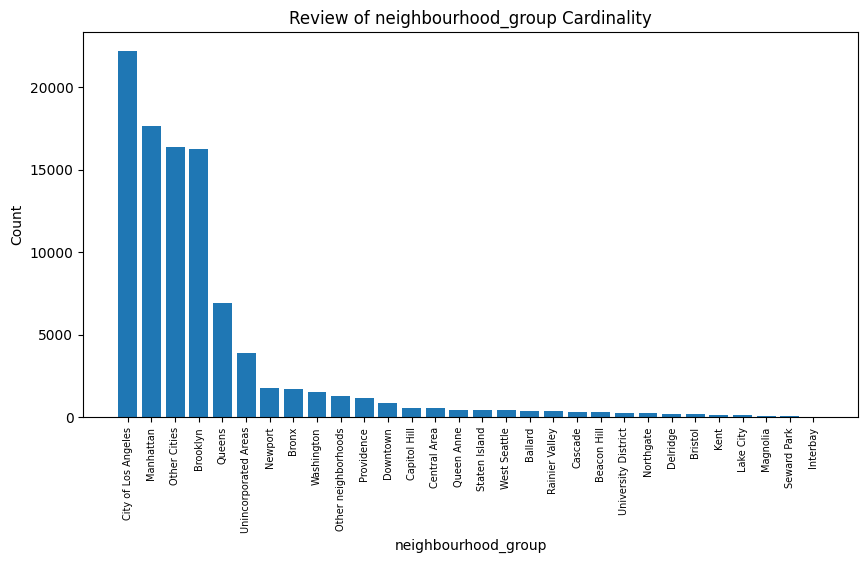

Unique values to check cardinality are


30

In [23]:
neighbourhood_group = details['neighbourhood_group'].value_counts()
pyplot.figure(figsize=(10,5))

pyplot.bar(neighbourhood_group.index, neighbourhood_group.values)

pyplot.title('Review of neighbourhood_group Cardinality')
pyplot.xlabel('neighbourhood_group')
pyplot.ylabel('Count')
pyplot.xticks(fontsize=7, rotation=90)
pyplot.show()

print('Unique values to check cardinality are')
details['neighbourhood_group'].nunique()

In [24]:
details['neighbourhood'].nunique()

1412

There are total of 1412 neighbourhood for 232147 data entries. That is not a irregular cardinality. 

### 3. [0.75] Data Preparation

#### a) Preprocess your data according to the data quality plan.

In [20]:
import pandas as pd

In [21]:
data = pd.read_csv('AB_US_2023.csv')
data.head()

C:\Users\Tasne\AppData\Local\Temp\ipykernel_28932\3204684119.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('AB_US_2023.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


In [22]:
data.drop(['id', 'name', 'host_id', 'host_name', 'number_of_reviews_ltm', 'reviews_per_month', 
           'last_review', 'calculated_host_listings_count', 'latitude',
           'availability_365', 'longitude'], axis=1, inplace=True)

In [23]:
data.isnull().sum() * 100 / len(data)

neighbourhood_group    58.431511
neighbourhood           0.000000
room_type               0.000000
price                   0.000000
minimum_nights          0.000000
number_of_reviews       0.000000
city                    0.000000
dtype: float64

In [24]:
# drop neighbourhood_group because there are too many nan values
data.drop(['neighbourhood_group'], axis=1, inplace=True)

In [25]:
data.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,city
0,Western Addition,Entire home/apt,202,2,383,San Francisco
1,Bernal Heights,Entire home/apt,235,30,111,San Francisco
2,Haight Ashbury,Private room,56,32,9,San Francisco
3,Western Addition,Entire home/apt,575,9,28,San Francisco
4,Mission,Private room,110,1,770,San Francisco


In [26]:
unique = data['city'].unique()
len(unique)

27

In [27]:
unique = data['neighbourhood'].unique()
len(unique)

1412

In [28]:
unique = data['room_type'].unique()
len(unique)

4

In [29]:
# convert string fields to numerical
city_map = dict(enumerate(data['city'].astype('category').cat.categories))
data['city'] = data['city'].astype('category').cat.codes
data['neighbourhood'] = data['neighbourhood'].astype('category').cat.codes
data['room_type'] = data['room_type'].astype('category').cat.codes

In [30]:
# data.drop(data[data['price']>3000], axis=0, inplace=True)
data.drop(data[data['price'] > 20000].index, inplace = True)

In [31]:
len(data)

232095

In [32]:
data.sample(n = 5)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,city
66963,677,2,189,10,121,13
66196,1239,0,120,1,41,10
47234,767,0,675,30,0,10
203404,1215,0,378,2,2,3
81372,710,2,180,30,4,13


### 4. [1.75] Data Insights

#### a) Build the correlation heatmap of the features in the ABT. Derive insights from it and relate it to the business problem being addressed. [0.75]

In [33]:
import seaborn as sns

<AxesSubplot:>

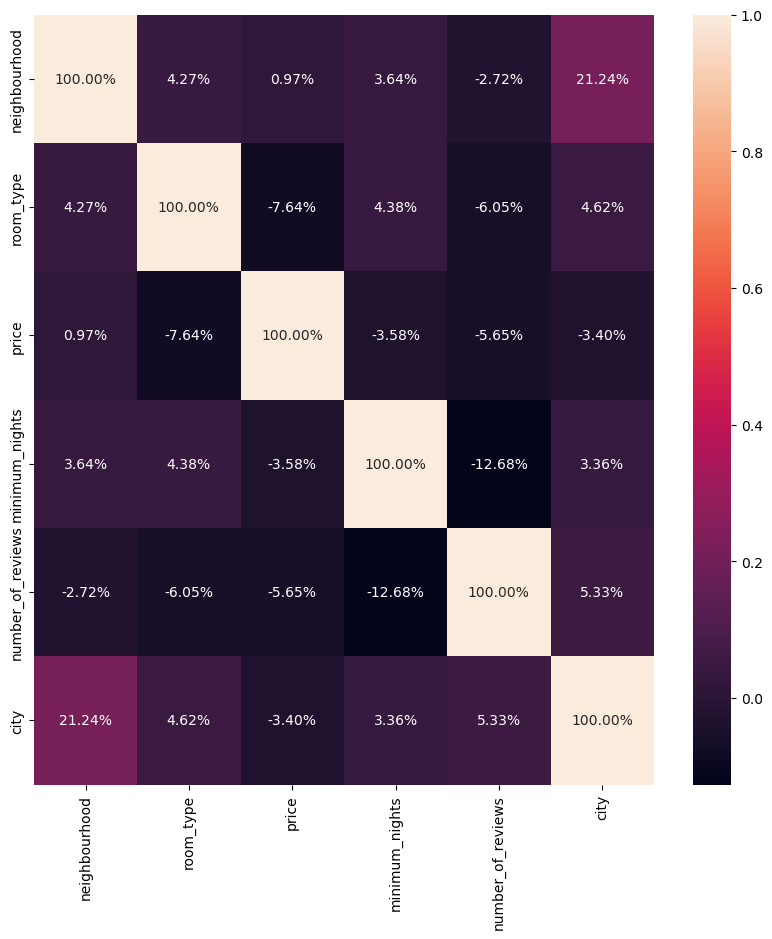

In [34]:
data_corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data_corr, annot=True, fmt='.2%', ax=ax)

The problem we are trying to solve is to predict a reasonable price given city, number of reviews, minimum nights, room type and neighbourhood. The heat map shows what we know theoretically, neighbourhood and city have good correlation to the price. While price have no strong direct correlation to minimum nights, but as seen from the heatmap, it has a strong correlation with neighbourhood and city. Number of reviews only seems to have a good correlation with the city. Needless to say, city and neighbourhood have a really strong correlation. One thing that can be noticed is that room type did not correlate strongly with the price (which was expected), so another heatmap is created below.

C:\Users\Tasne\AppData\Local\Temp\ipykernel_28932\736411330.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data.drop(['city'], axis=1, inplace=True)


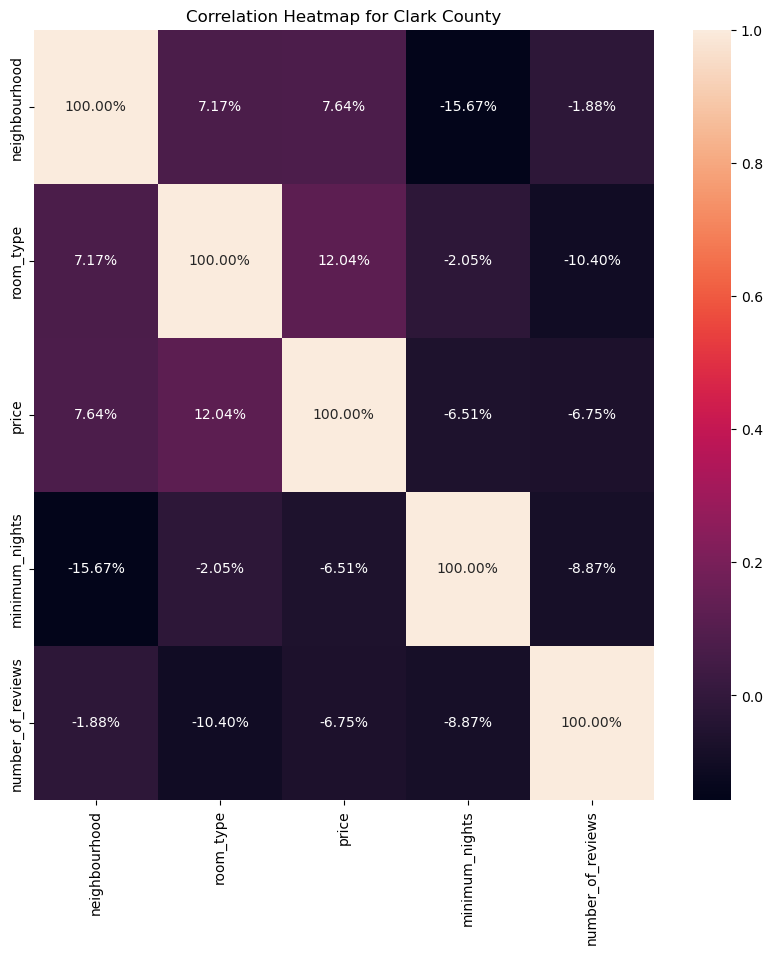

In [35]:
city = 6
if city in data['city'].unique():
    city_data = data[data['city'] == city]
    city_name = city_map[city]
    city_data.drop(['city'], axis=1, inplace=True)
    city_corr = city_data.corr()
    fig, ax = plt.subplots(figsize=(10,10)) 
    sns.heatmap(city_corr, annot=True, fmt='.2%', ax=ax)
    plt.title(f"Correlation Heatmap for {city_name}")
    plt.show()

In this heatmap, only the airbnb listings in Clark County was taken into account, as evident from the plot, price has a very high correlation to room type. This trend is seen in all the other cities, if a heatmap is plotted for each individual city. This trend is seen because a single room in new york city (busy place) will be more expensive than a whole house in clark county (less busy place). So for our business problem we may have to group together cities before predicting based on room types.

##### i. What are the descriptive features that highly correlate with the target feature? Propose some hypotheses explaining the correlation. [0.5] <br>

The discriptive features that highly correlate with the target feature are:

1. Neighbourhood: some neighgbourhoods are better than others hence higher price. Also, within a city there are different regions where some are cheaper while others are costlier hence price and neighbourhood are correlated.
2. City: cities with more tourism or densly populated (urban) will tend to have higher prices than with cities with low tourist attraction or less population (rural).
3. Minimum nights: if minimum nights requirement is lower, prices will be higher compared to if the minimum nights requiremnet is higher. Even in the data exploration section above, this trend is evident.

##### ii. What are the domain concepts that highly correlate with each other? Propose some hypotheses explaining the correlation. [0.25] <br>

Cities and neighbourhood have a high correlation since many neighbourhoods are part of one city.

Room type is highly correlated with city/neighbourhood because some neighbourhood has bigger houses with more rooms, vs some cities have more hotels and since city and neighbourhood correlate to eachother, they are also correlated with room type.

In urban cities, people tend to stay for longer for buisness/medical purposes, where as in tourist areas people come to visit for a day or two therefore minimum nights correlate strongly with city and neighbourhood.

##### iii. Are there any features that are useless for a predictive model? [0.25] <br>

Room type and price seems not directly related, this is because, a single room in New York city may be the same price as a single room in Nashville. Although the correlation is not high, it will be high once the heatmap is created if grouped by cities.

Number of reviews and price are not correlated, so we can conclude that number of reviews is a useless feature for the predictive model.

### References:

1. https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed <a id='3'></a>